In [1]:
# If merge sort and insertion sort are compared, then insertion sort will be faster than merge sort until n = 500. Then merge sort will consistently be faster than insertion sort.

In [2]:
# Methods:
# I will start with writing my sort algorithms, insertion sort and merge sort. Insertion sort will be written to have O(n^2) worst case time complexity and Merge sort will be written to have O(nlogn) worst case time complexity. Next, I will need to keep track of the time it takes to sort data of size n. I'll create 2 lists to hold the times for insertion and merge sorts. I'll then build my lists of ints up to n. This gives me a list in reverse sorted order, so I will ensure my sorts are always worst case. I will then time my sorts by using the timeit function provided by the timeit module and append them to their respective lists. Finally, using matplotlib, I will plot my lists and analyze the graphs to find the size (n) where merge sort becomes faster than insertion sort by looking at the intersection of the graphs.

In [3]:
import timeit
import matplotlib.pyplot as plt

In [4]:
# Code taken from lecture slides and geeks for geeks: https://www.geeksforgeeks.org/insertion-sort/#
def insertionSort(arr):
 
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
 
        key = arr[i]
 
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

In [5]:
# Code taken and modified from geeks for geeks: https://www.geeksforgeeks.org/merge-sort/
def mergeSort(arr):
    length = len(arr)
    mid = length // 2
    if length < 2:
        return
    lower = arr[0:mid]
    upper = arr[mid:length]
    mergeSort(lower)
    mergeSort(upper)
    i = j = 0
    while i + j < length:
        if j == len(upper) or (i < len(lower) and lower[i] < upper[j]):
            arr[i+j] = lower[i]
            i = i+1
        else:
            arr[i+j] = upper[j]
            j = j+1
            

In [6]:
merge_times = []
insertion_times = []
for i in range(1, 301):
    arr1 = []
    arr2 = []
    for j in range(i, 0, -1):
        arr1.append(j)
        arr2.append(j)
    time1 = timeit.timeit(lambda: insertionSort(arr1.copy()), number = 100)
    insertion_times.append(time1/100)
    time2 = timeit.timeit(lambda: mergeSort(arr2.copy()), number = 100)
    merge_times.append(time2/100)

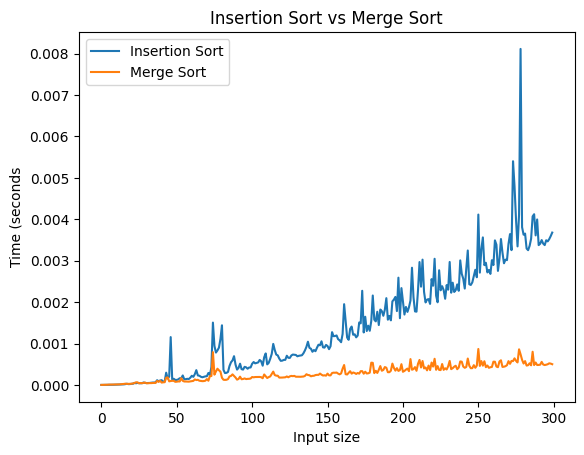

In [7]:
plt.plot(insertion_times, label= "Insertion Sort")
plt.plot(merge_times, label= "Merge Sort")
plt.legend()
plt.xlabel("Input size")
plt.ylabel("Time (seconds")
plt.title("Insertion Sort vs Merge Sort")
plt.show()

In [8]:
# In the graph, merge sort clearly become consistently faster than insertion sort when the input size is around 80. I did not expect merge sort to become faster so quickly, as my original hypothesis predicted it would be until an input size of 300. This does make sense in retrospect as 80^2 is much slower than 80log(80). A challenge I ran into was figuring out how to use timeit precisely. I needed to sort a copy of my data 1000 times to get an accurate reading. Originally, I passed the original data into my sorting algorithm, which meant that after one sort, the remaining 99 were sorting a sorted array causing my insertion sort to appear faster than merge sort. By passing in arr.copy() to my sorts, I ensured that I had an accurate time for each sort.

In [9]:
# After conducting my experiment, insertion sort provides a faster algorithm for n < 80 while merge sort is a faster algorithm for n >= 80.